In [1]:
from model import *



random.seed(100)

pi_stars_probs = [0.6, 0.3, 0.1]

interpolation_data = generate_data(pi_stars_probs, 300)
interpolation_data = [(x[0], x[1], None) for x in interpolation_data]

print(f'Number of training examples for interpolation test: {len(interpolation_data)}')

pi_ref_probs = torch.tensor([0.4, 0.4, 0.2])

pi_ref_theta = recover_params_with_probs(pi_ref_probs)
print(f'Reference model recovered with probs: {F.softmax(torch.tensor(pi_ref_theta), -1)}')

Number of training examples for interpolation test: 213
Reference model recovered with probs: tensor([0.4000, 0.4000, 0.2000])


In [2]:
num_epochs = 1000
batch_size = 20
lr = 1e-3

_, dpo_steps1, dpo_probs1, _ = train(interpolation_data, pi_ref_theta, 'dpo', 1e-5, num_epochs=num_epochs, lr=lr,  batch_size=batch_size)
_, dpo_steps2, dpo_probs2, _ = train(interpolation_data, pi_ref_theta, 'dpo', 100, num_epochs=num_epochs, lr=lr,  batch_size=batch_size)

_, ipo_steps1, ipo_probs1, _ = train(interpolation_data, pi_ref_theta, 'ipo', 1e-5, num_epochs=num_epochs, lr=lr,  batch_size=batch_size)
_, ipo_steps2, ipo_probs2, _ = train(interpolation_data, pi_ref_theta, 'ipo', 100, num_epochs=num_epochs, lr=lr,  batch_size=batch_size)




Training dpo


Training dpo
Training ipo
Training ipo


In [3]:
_, fdpo_steps1, fdpo_probs1, _ = train(interpolation_data, pi_ref_theta, 'f-dpo', 1e-5, num_epochs=3000, lr=lr,  batch_size=batch_size)
_, fdpo_steps2, fdpo_probs2, _ = train(interpolation_data, pi_ref_theta, 'f-dpo', 100, num_epochs=3000, lr=lr,  batch_size=batch_size)

Training f-dpo


Training f-dpo


In [4]:
_, expo_steps1, expo_probs1, _ = train(interpolation_data, pi_ref_theta, 'expo', 1e-5, num_epochs=1000, lr=5e-4,  batch_size=20)
_, expo_steps2, expo_probs2, _ = train(interpolation_data, pi_ref_theta, 'expo', 100, num_epochs=1000, lr=5e-4,  batch_size=20)

Training expo


/home/ubuntu/.local/lib/python3.10/site-packages/torch/nn/functional.py:2919: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


Training expo


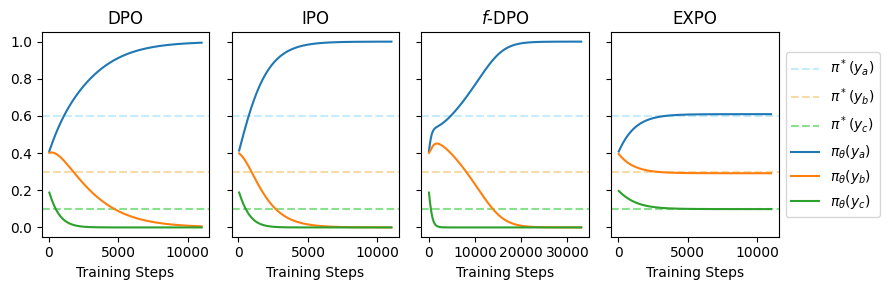

In [5]:
import matplotlib.pyplot as plt


fig, axies = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(9, 3))

y1_color = '#C5EBFC'
y2_color = '#F7DBA6'
y3_color = '#8AE18D'

for i in range(4):
    axies[i].set_xlabel('Training Steps')
    axies[i].axhline(0.6, linestyle='--', color=y1_color, label='$\pi^*(y_a)$')
    axies[i].axhline(0.3, linestyle='--', color=y2_color, label='$\pi^*(y_b)$')
    axies[i].axhline(0.1, linestyle='--', color=y3_color, label='$\pi^*(y_c)$')


axies[0].set_title('DPO')
axies[0].plot(dpo_steps1, [x[0] for x in dpo_probs1], label='$\pi_{\\theta}(y_a)$')
axies[0].plot(dpo_steps1, [x[1] for x in dpo_probs1], label='$\pi_{\\theta}(y_b)$')
axies[0].plot(dpo_steps1, [x[2] for x in dpo_probs1], label='$\pi_{\\theta}(y_c)$')

axies[1].set_title('IPO')
axies[1].plot(ipo_steps1, [x[0] for x in ipo_probs1], label='$\pi_{\\theta}(y_a)$')
axies[1].plot(ipo_steps1, [x[1] for x in ipo_probs1], label='$\pi_{\\theta}(y_b)$')
axies[1].plot(ipo_steps1, [x[2] for x in ipo_probs1], label='$\pi_{\\theta}(y_c)$')

axies[2].set_title('$f$-DPO')
axies[2].plot(fdpo_steps1, [x[0] for x in fdpo_probs1], label='$\pi_{\\theta}(y_a)$')
axies[2].plot(fdpo_steps1, [x[1] for x in fdpo_probs1], label='$\pi_{\\theta}(y_b)$')
axies[2].plot(fdpo_steps1, [x[2] for x in fdpo_probs1], label='$\pi_{\\theta}(y_c)$')

axies[3].set_title('EXPO')
axies[3].plot(expo_steps1, [x[0] for x in expo_probs1], label='$\pi_{\\theta}(y_a)$')
axies[3].plot(expo_steps1, [x[1] for x in expo_probs1], label='$\pi_{\\theta}(y_b)$')
axies[3].plot(expo_steps1, [x[2] for x in expo_probs1], label='$\pi_{\\theta}(y_c)$')



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.suptitle('Interpolation Test with $\lambda$=1e-5', fontsize=16, y=0.95)
plt.tight_layout()
fig.show()
fig.savefig('toy_exp_interpolation_1.pdf', dpi=300)

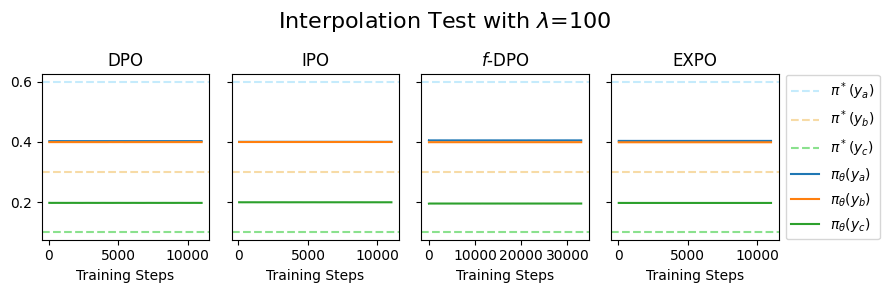

In [6]:
fig, axies = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(9, 3))

y1_color = '#C5EBFC'
y2_color = '#F7DBA6'
y3_color = '#8AE18D'

for i in range(4):
    axies[i].set_xlabel('Training Steps')
    axies[i].axhline(0.6, linestyle='--', color=y1_color, label='$\pi^*(y_a)$')
    axies[i].axhline(0.3, linestyle='--', color=y2_color, label='$\pi^*(y_b)$')
    axies[i].axhline(0.1, linestyle='--', color=y3_color, label='$\pi^*(y_c)$')


axies[0].set_title('DPO')
axies[0].plot(dpo_steps2, [x[0] for x in dpo_probs2], label='$\pi_{\\theta}(y_a)$')
axies[0].plot(dpo_steps2, [x[1] for x in dpo_probs2], label='$\pi_{\\theta}(y_b)$')
axies[0].plot(dpo_steps2, [x[2] for x in dpo_probs2], label='$\pi_{\\theta}(y_c)$')

axies[1].set_title('IPO')
axies[1].plot(ipo_steps2, [x[0] for x in ipo_probs2], label='$\pi_{\\theta}(y_a)$')
axies[1].plot(ipo_steps2, [x[1] for x in ipo_probs2], label='$\pi_{\\theta}(y_b)$')
axies[1].plot(ipo_steps2, [x[2] for x in ipo_probs2], label='$\pi_{\\theta}(y_c)$')

axies[2].set_title('$f$-DPO')
axies[2].plot(fdpo_steps2, [x[0] for x in fdpo_probs2], label='$\pi_{\\theta}(y_a)$')
axies[2].plot(fdpo_steps2, [x[1] for x in fdpo_probs2], label='$\pi_{\\theta}(y_b)$')
axies[2].plot(fdpo_steps2, [x[2] for x in fdpo_probs2], label='$\pi_{\\theta}(y_c)$')

axies[3].set_title('EXPO')
axies[3].plot(expo_steps2, [x[0] for x in expo_probs2], label='$\pi_{\\theta}(y_a)$')
axies[3].plot(expo_steps2, [x[1] for x in expo_probs2], label='$\pi_{\\theta}(y_b)$')
axies[3].plot(expo_steps2, [x[2] for x in expo_probs2], label='$\pi_{\\theta}(y_c)$')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle('Interpolation Test with $\lambda$=100', fontsize=16, y=0.96)
plt.tight_layout()
fig.show()
fig.savefig('toy_exp_interpolation_2.pdf', dpi=300)